<a href="https://colab.research.google.com/github/momopmkr/momo/blob/main/%EC%96%B4%EB%A6%B0%EC%99%95%EC%9E%90_%EC%B1%85_%EB%AA%85%EC%82%AC_%EB%B9%88%EB%8F%84%EC%88%98_%EC%83%81%EC%9C%84_20%EA%B0%9C_%EA%B5%AC%ED%95%98%EA%B8%B0_%EC%95%88%EC%9D%80%EC%98%81_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install konlpy
!pip install sklearn
!pip install WordCloud

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import csv

with open('./sample_data/어린왕자.txt', 'r', encoding='cp949') as f:
  text = f.read()

okt = Okt()
words=okt.nouns(text) # 명사만 추출
words = [n for n in words if len(n) > 1] # 단어의 길이가 1개인 것은 제외

count = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함
f.close()

noun_list=count.most_common(20)

for v in noun_list:
  print(v)

with open("./sample_data/어린왕자_명사리스트.txt",'w', newline='',encoding='euc-kr') as f:
  csvw=csv.writer(f)
  for v in noun_list:
    csvw.writerow(v)

#with open("./sample_data/어린왕자_명사리스트.txt",'w',encoding='cp949') as f:
# for v in noun_list:
#	f.write(" ".join(map(str,v)))
#	f.write("\n")


('왕자', 183)
('사람', 133)
('그것', 56)
('다시', 54)
('생각', 52)
('대답', 50)
('아저씨', 41)
('때문', 34)
('여우', 34)
('그림', 32)
('가로등', 31)
('아주', 29)
('가지', 28)
('하나', 27)
('다른', 27)
('거지', 27)
('이야기', 26)
('친구', 26)
('아무', 26)
('어른', 25)


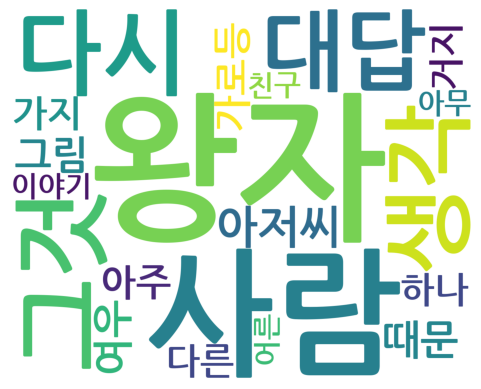

In [4]:
import sys
# 자신의 컴퓨터 환경에 맞는 한글 폰트 경로를 설정(window에서)
#font_path = 'malgun'  # C:/Windows/Fonts/
#font_path = 'HMKMMAG' # C:/Windows/Fonts/HMKMMAG.TTF
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
# 워드클라우드로 그래프로 시각화
wc = WordCloud(width = 1500, height = 1200, background_color="white", font_path = font_path)
plt.imshow(wc.generate_from_frequencies(dict(noun_list))) #딕셔너리
plt.axis("off")
plt.show()
wc.to_file(f'./sample_data/어린왕자_워드클라우드.png')


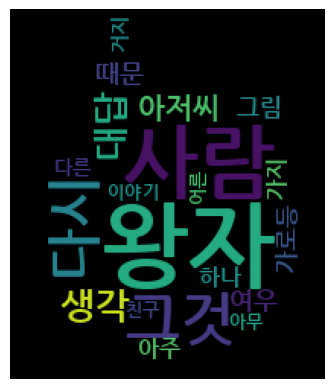

In [29]:
import numpy as np
from PIL import Image
import sys

# 자신의 컴퓨터 환경에 맞는 한글 폰트 경로를 설정(window에서)
#font_path = 'malgun'  # C:/Windows/Fonts/
#font_path = 'HMKMMAG' # C:/Windows/Fonts/HMKMMAG.TTF
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'

mask = np.array(Image.open("./sample_data/image.jpg"))

# 워드클라우드로 그래프로 시각화
wc = WordCloud(width = 1500, height = 1200, background_color="black", font_path = font_path,mask=mask)
plt.imshow(wc.generate_from_frequencies(dict(noun_list))) #딕셔너리
plt.axis("off")
plt.show()
wc.to_file(f'./sample_data/어린왕자_워드클라우드.png')

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 높은 해상도로 ﻿폰트 주변이 흐릿하게 보이는 것을 방지
%config InlineBamkend.figure_format = 'retina'

# matplotlib가 사용하는 폰트 경로 확인
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

# 폰트 경로를 전달해 폰트이름을 가져옴
font_name = fm.FontProperties(fname=fontpath, size=10).get_name()

# matplotlib가 사용할 글꼴을 나눔바른고딕으로 변경
plt.rc('font', family=font_name)

([<matplotlib.axis.YTick at 0x7b83bad06470>,
 [Text(0, 0, '왕자'),
  Text(0, 1, '사람'),
  Text(0, 2, '그것'),
  Text(0, 3, '다시'),
  Text(0, 4, '생각'),
  Text(0, 5, '대답'),
  Text(0, 6, '아저씨'),
  Text(0, 7, '때문'),
  Text(0, 8, '여우'),
  Text(0, 9, '그림'),
  Text(0, 10, '가로등'),
  Text(0, 11, '아주'),
  Text(0, 12, '가지'),
  Text(0, 13, '하나'),
  Text(0, 14, '다른'),
  Text(0, 15, '거지'),
  Text(0, 16, '이야기'),
  Text(0, 17, '친구'),
  Text(0, 18, '아무'),
  Text(0, 19, '어른')])

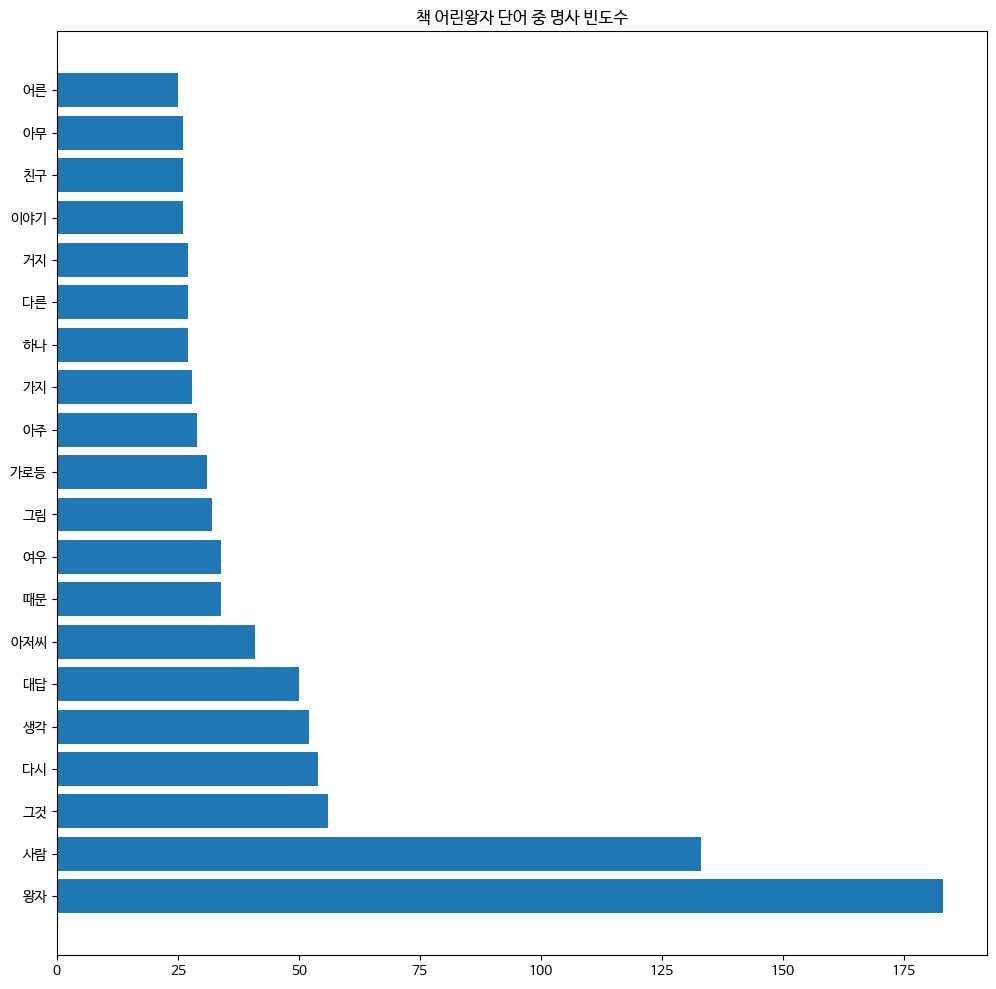

In [6]:
plt.figure(figsize=(12, 12))               # 이미지 사이즈를 설정하고 이미지 생성
y_height = range(0, len(noun_list))       # y축 높이 지정
plt.barh(y_height,dict(noun_list).values())     # 수평막대 그리기
plt.title("책 어린왕자 단어 중 명사 빈도수")      #  차트 제목 설정
plt.yticks(y_height, dict(noun_list).keys())     #  y축 틱에 label 붙이기

In [7]:
!pip install squarify

<Axes: >

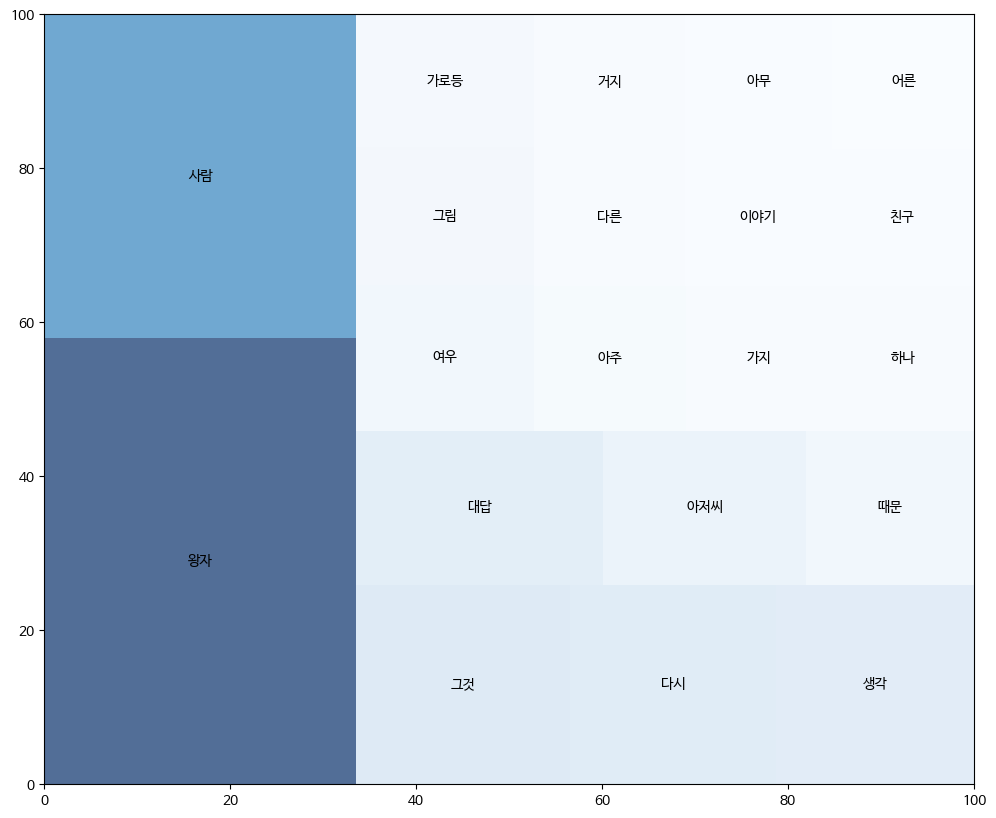

In [8]:
import squarify

plt.figure(figsize=(12, 10))

# 빈도값을 0~1까지 값을 갖도록 min-max 표준화
norm = mpl.colors.Normalize(vmin=min(dict(noun_list).values()),
                            vmax=max(dict(noun_list).values()))

# 정규화된 값을 matplotlib의 cm(color map)에서 Blue 에 적용
colors = [mpl.cm.Blues(norm(value)) for value in dict(noun_list).values()]

# squarify 플랏생성(label 단어, 박스 크기는 빈도, 색깔르 cm.Blue, 투명도는 30%
squarify.plot(label=dict(noun_list).keys(),
              sizes=dict(noun_list).values(),
              color=colors,
              alpha=.7)


TypeError: ignored

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49455 (\N{HANGUL SYLLABLE SEOS}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49455 (\N{HANGUL SYLLABLE SEOS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


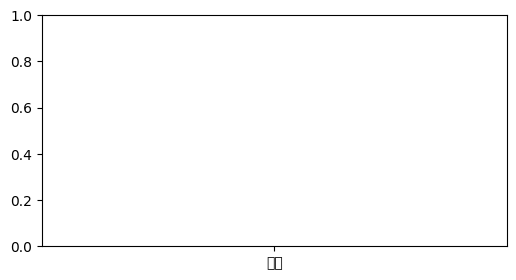

In [46]:
plt.bar(words,count)

# 3. 그래프 꾸미기
plt.title('어린왕자') # 그래프 제목
plt.xlabel('단어')                    # x축 이름
plt.ylabel('빈도수')                  # y축 이름
plt.xticks(rotation = 45)             # X축 레이블 회전
plt.show()                            # 그래프 출력하기

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('단어 상위', fontsize=17)
plt.ylabel('단어의 빈도수')
plt.xticks(rotation=70)
for key, value in noun_list.items():
    if key == '왕자': continue
    plt.bar(key, value, color='lightgrey')
plt.show()

In [ ]:
#빈도수 상위 20개의 단어를 추출하여 역순으로 정렬
n = sorted_word_count[:20][::-1]

#추출된 단어에 대해 빈도를 추출
w = [alice_word_count[key] for key in n]

#수평 막대 그래프
plt.barh(range(len(n)), w, tick_label = n)
plt.show()

NameError: ignored